Import the Libraries

In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

In [2]:
# loading the dataset into the frame:
data = pd.read_csv("C:/Users/nn474/OneDrive/Desktop/Machinelearning/creditcard.csv")

In [3]:
# Firsr five rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# last five rows of the dataset:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Dataset information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking for missing values:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# The distribution of legit transactions and fraudulent transactions:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This data is highly balanced 
 0 --> Normal Transaction 
 1 --> Fraudulent Transaction

In [8]:
# Seperating the data into Legit and Fraudulent transactions:
Legit =data[data.Class ==0]
Fraud =data[data.Class ==1]
print(Legit.shape)
print(Fraud.shape)

(284315, 31)
(492, 31)


In [9]:
# Statisitical Measurements of the data: 
Legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
# comapre the values of both the classes:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under Sampling 


Build a new dataset that cnotains the similar distributio of mornal transactions and Fradudulent Transactions :

Number of Fraudulent Transaction -->  492

In [12]:
legit_sample = Legit.sample(n=492) # 492 is the number of fraud transactions
new_data = pd.concat([legit_sample, Fraud], axis=0)
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
143329,85283.0,-0.874547,-3.727990,-0.006916,1.021932,-1.791978,1.262043,0.398051,0.254694,0.830820,...,0.480014,-0.646509,-0.754241,-0.179947,-0.426860,0.846841,-0.196249,0.172679,1017.28,0
250423,154900.0,-0.609114,0.659625,-0.129347,-0.198789,0.802315,1.173603,0.355378,0.814431,-0.722527,...,0.048383,0.099012,0.179360,-1.409793,-0.889134,0.475879,0.043164,0.082212,52.21,0
153159,98055.0,-0.968024,2.242909,-0.604014,4.499358,1.052967,-0.021801,1.251566,-1.422295,-0.662417,...,0.782527,0.512879,0.078440,-0.143754,-0.683609,0.386422,0.166417,0.414573,77.00,0
73058,54956.0,1.104602,-0.150283,0.662313,0.786420,-0.538224,0.073052,-0.321841,0.191414,0.402692,...,0.005527,0.218171,-0.050076,0.287311,0.438100,0.437773,-0.007674,0.000326,16.98,0
190081,128681.0,1.910299,0.683046,-1.032632,3.743651,0.745363,-0.205005,0.533400,-0.141715,-1.437747,...,0.040833,0.208781,0.103745,0.002786,0.173663,0.000660,-0.060180,-0.070606,0.00,0


In [13]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [14]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [15]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93011.825203,0.071308,0.009179,-0.033490,0.045265,-0.113128,0.056771,0.096677,-0.036804,-0.055026,...,-0.038278,0.018305,0.001600,0.003534,-0.030861,-0.007632,0.012808,-0.012254,0.016030,104.796240
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into FEatures and Targets: 

In [16]:
X = new_data.drop(columns='Class', axis =1)

In [17]:
Y = new_data['Class']

In [18]:
print(X.shape)

(984, 30)


In [19]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
143329   85283.0 -0.874547 -3.727990 -0.006916  1.021932 -1.791978  1.262043   
250423  154900.0 -0.609114  0.659625 -0.129347 -0.198789  0.802315  1.173603   
153159   98055.0 -0.968024  2.242909 -0.604014  4.499358  1.052967 -0.021801   
73058    54956.0  1.104602 -0.150283  0.662313  0.786420 -0.538224  0.073052   
190081  128681.0  1.910299  0.683046 -1.032632  3.743651  0.745363 -0.205005   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [20]:
print(Y)

143329    0
250423    0
153159    0
73058     0
190081    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into training and testing data:

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training


Logistic Regression

In [28]:
model = LogisticRegression()


In [29]:
# Trainig the logistic regression with Training Data:
model.fit(X_train, Y_train)

c:\Users\nn474\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluaiton:

Accruacy Score:

In [30]:
# Accuracy on the Training Data:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy)

Accuracy on Training Data :  0.9466327827191868


In [31]:
# Accuracy on Test Data:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy)

Accuracy on Test Data :  0.9238578680203046


In [36]:
# Calculate prediction accuracy:
accuracy = accuracy_score(Y_test, X_test_prediction)
print(f'Prediction Accuracy Score: {accuracy:.12f}')


Prediction Accuracy Score: 0.923857868020


30


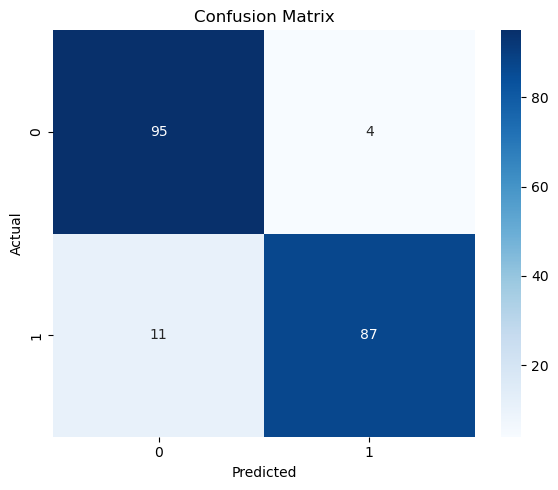

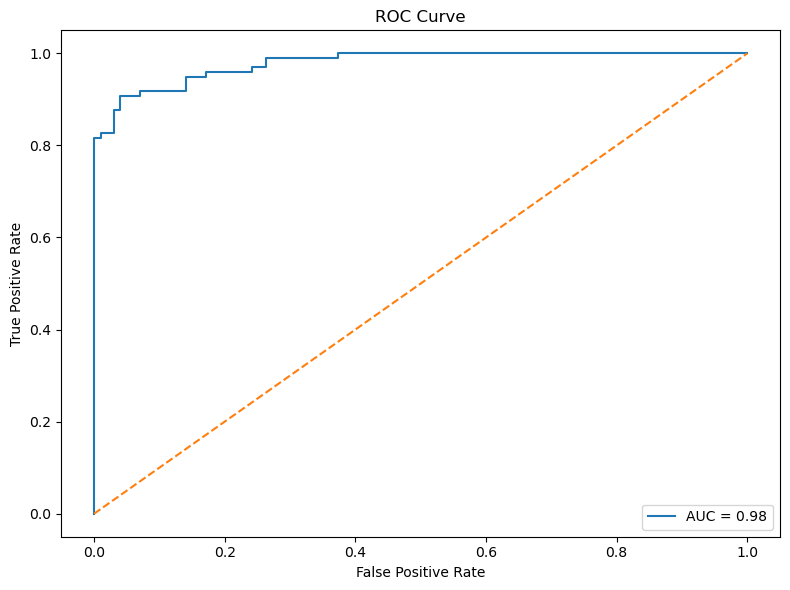

Feature Coefficients:
V4        0.681524
V5        0.312595
V11       0.237667
V20       0.170794
V22       0.056028
V19       0.054141
V27       0.037936
V21       0.030360
V24       0.017704
V1        0.006720
Amount    0.000641
Time     -0.000027
V18      -0.016022
V28      -0.036888
V25      -0.042086
V26      -0.043378
V23      -0.055216
V15      -0.115474
V8       -0.129329
V2       -0.130973
V13      -0.158870
V9       -0.223823
V16      -0.334632
V7       -0.335867
V6       -0.342408
V17      -0.386375
V10      -0.479515
V12      -0.498144
V3       -0.621667
V14      -0.935353
dtype: float64

Feature Coefficients (including intercept):
V4           0.681524
V5           0.312595
V11          0.237667
V20          0.170794
V22          0.056028
V19          0.054141
V27          0.037936
V21          0.030360
V24          0.017704
V1           0.006720
Amount       0.000641
Time        -0.000027
V18         -0.016022
V28         -0.036888
V25         -0.042086
V26         -0.043

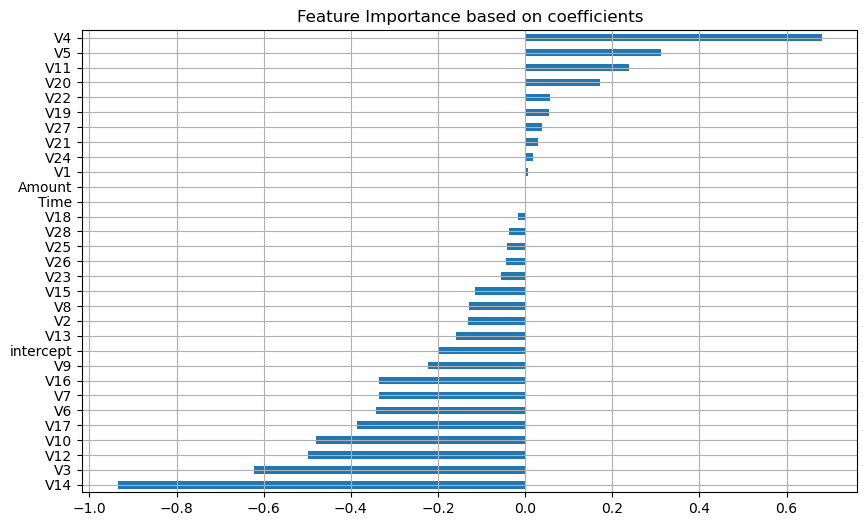

In [43]:
print(len(features))  # Should be 30

# Confision Matrix:
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot = True, fmt ='d', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Roc Curve:
Y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc= auc (fpr,tpr) 

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Display model coefficients for insight 
features = list(X.columns)
coefficients = pd.Series(model.coef_[0], index = features)
print('Feature Coefficients:')
print(coefficients.sort_values(ascending=False))
print()

# Create a Series with all coefficients including the intercept
all_features = ['intercept'] + features
# Create a Series with all coefficients including the intercept
all_coefficients = pd.Series([model.intercept_[0]] + list(model.coef_[0]), index=all_features)

print('Feature Coefficients (including intercept):')
print(all_coefficients.sort_values(ascending=False))

# Bar plot of coefficient:
plt.figure(figsize = (10,6))
all_coefficients.sort_values().plot(kind='barh', grid = True)
plt.title('Feature Importance based on coefficients')
plt.tight_layout 
plt.show()